# Xây dựng mô hình dự đoán khách hàng quay trở lại: Trường hợp nghiên cứu đối với chuỗi cửa hàng bán lẻ

## Định nghĩa vấn đề

### Tổng quan dự án

- Hiện tại, chuỗi bán lẻ TCT đang đối mặt với thách thức lớn là tỷ lệ khách hàng quay lại mua sắm không cao. Điều này không chỉ ảnh hưởng đến doanh thu mà còn giảm khả năng xây dựng một cơ sở khách hàng trung thành. 

- Việc không giữ được khách hàng sau lần mua sắm đầu tiên là dấu hiệu của trải nghiệm khách hàng không tối ưu, hoặc chương trình khách hàng thân thiết chưa hiệu quả.

- Đề tài này nhằm mục đích phân tích và tối ưu hóa khả năng quay lại của khách hàng.

- Đề tài sẽ sử dụng các công cụ để thu thập, phân tích dữ liệu khách hàng và hiệu suất bán hàng từ chuỗi bán lẻ. 

- Các kết quả phân tích sẽ được sử dụng để đề xuất các chiến lược giúp cải thiện trải nghiệm khách hàng, tối ưu hóa chương trình khách hàng thân thiết, và gia tăng tỷ lệ khách hàng quay lại mua sắm.

### Hiểu rõ vấn đề

- Hiểu lý do tại sao và khi nào khách hàng có nhiều khả năng rời đi nhất có thể dẫn đến các hành động để cải thiện việc giữ chân khách hàng cũng như có thể lên kế hoạch tiếp thị mới trước.


- Đề tài sẽ cố gắng giải quyết các vấn đề sau:
>- Khả năng một khách hàng rời khỏi cửa hàng là gì?
>
>- Các chỉ số chính của một khách hàng rời khỏi cửa hàng là gì?
>
>- Những chính sách hoặc chiến lược nào có thể được áp dụng dựa trên kết quả để cải thiện việc giữ chân khách hàng?**

### Tổng quan dữ liệu

- Bộ dữ liệu trong nghiên cứu này được lấy từ Kaggle [Sales Data FY 2020 - 2021](https://www.kaggle.com/datasets/nhiyen/sales-data-fy-2020-2021) chứa thông tin về các đơn đặt hàng của khách hàng trên trang web thương mại điện tử. Nó bao gồm các chi tiết về các đơn đặt hàng như ID đơn hàng, ngày đặt hàng, trạng thái đơn hàng, ID mặt hàng, số lượng đặt hàng, giá cả, giá trị, số tiền chiết khấu, tổng số, ID khách hàng, năm, số tham chiếu, tuổi, mã zip và tỷ lệ chiết khấu.

- Tập dữ liệu có tổng cộng 286.392 mục với 36 cột. ID mặt hàng, số lượng đặt hàng, giá, giá trị, số tiền chiết khấu, tổng số, ID khách hàng, năm, số tham chiếu, tuổi, mã zip và phần trăm chiết khấu là dữ liệu số, trong khi ID đơn hàng, ngày đặt hàng và trạng thái đơn hàng là dữ liệu phân loại.

## Phân tích dữ liệu

### Cài đặt thư viện

**Thư viện xử lý dữ liệu**

In [1]:
import pandas as pd
import numpy as np

**Thư viện trực quan hóa dữ liệu**

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

In [3]:
pd.set_option('display.max_columns', None)

**Tải dữ liệu**

In [4]:
df = pd.read_csv('Data/sales_06_FY2020-21_v2.csv', low_memory=False)
df.shape

(286392, 38)

#### Tổng quan

In [5]:
df.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent', 'customer_return', 'payment_status'],
      dtype='object')

In [6]:
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Customer Since,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent,customer_return,payment_status
0,100354678,10/1/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1,paid
1,100354678,10/1/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1,paid
2,100354680,10/1/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1,paid
3,100354680,10/1/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1,paid
4,100367357,11/13/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124,2020,Nov-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0,1,paid


> Tập dữ liệu chứa một số cột số và phân loại cung cấp nhiều thông tin khác nhau về đơn hàng và thông tin của nhân viên.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  int64  
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  int64  
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  int64  
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['item_id', 'qty_ordered', 'cust_id', 'year', 'ref_num', 'age', 'Zip', 'customer_return'], float64: ['price', 'value', 'discount_amount', 'total', 'Discount_Percent'], object: ['order_id', 'order_date', 'status', 'sku', 'category', 'payment_method', 'bi_st', 'month', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City', 'State', 'Region', 'User Name', 'payment_status']}

In [9]:
df.isna().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
customer_return     0
payment_status      0
dtype: int64

In [10]:
df.describe()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent,customer_return
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079,0.701608
std,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100,0.457553
min,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000,0.000000
25%,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000,0.000000
50%,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000,1.000000
75%,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000,1.000000
max,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000,1.000000


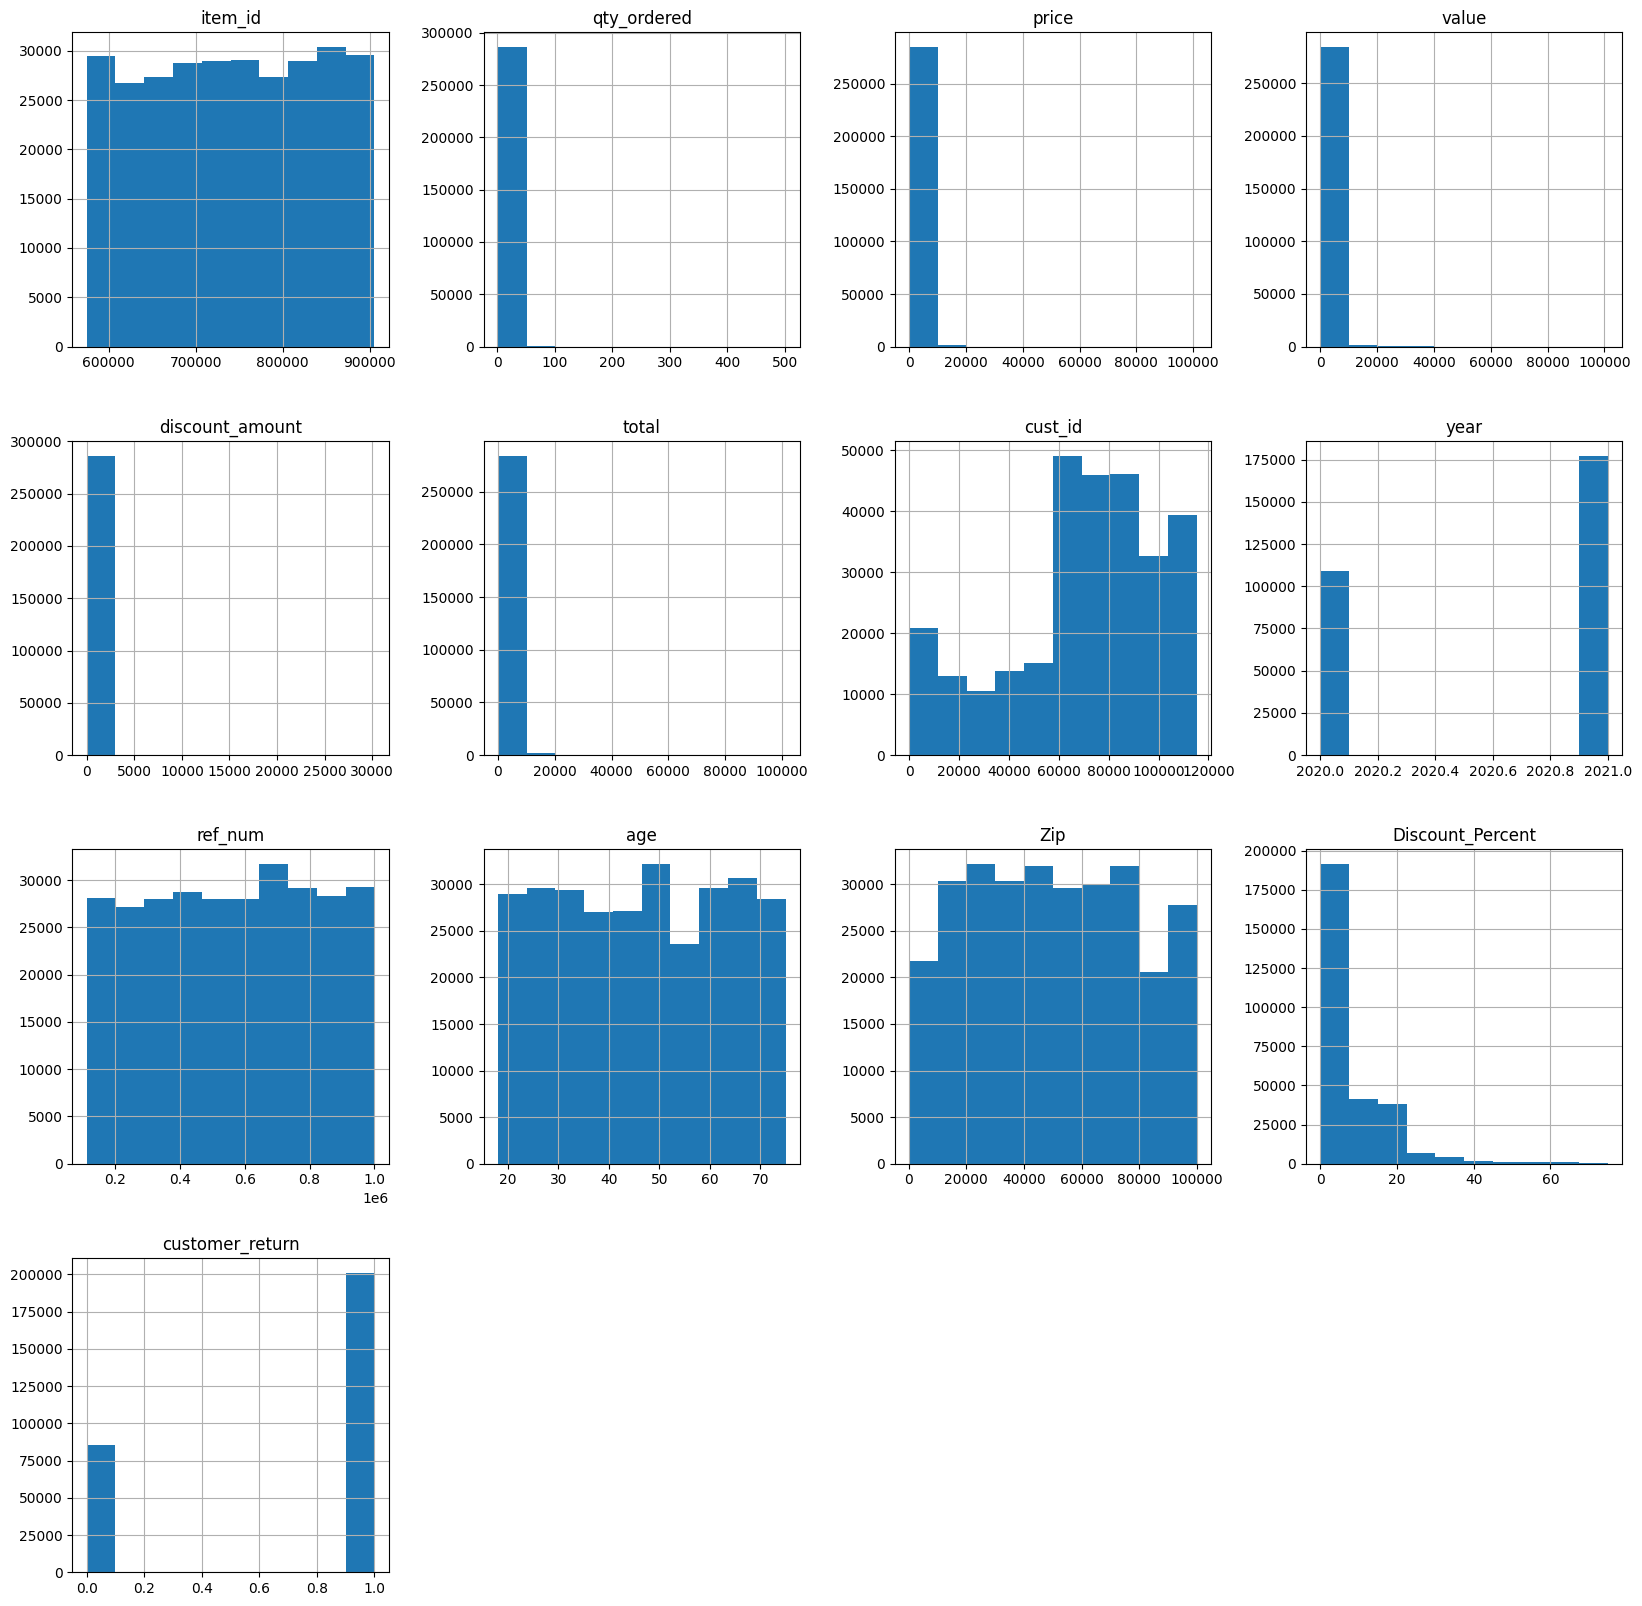

In [11]:
df.hist(figsize=(20,20))
plt.show()

>- Dựa trên phân phối gần như đồng đều của đặc trưng này thì phần lớn là các mã định danh duy nhất
>- Số lượng sản phẩm trong 1 đơn hàng thì luôn dưới 100
>- Giá của 1 sản phẩm phần lớn dưới 10.000 một phần nhỏ có giả trong khoảng 10.000-20.000
>- Độ tuổi không quá lệch về một khoảng nào cho thấy cửa hàng cung cấp đa dạng sản phẩm phù hớp với mọi lứa tuổi

#### Phân phối tính thuộc tính đích

**Xóa các cột mang tính định danh, thông tin cá nhân của khách hàng không ảnh hưởng đến kết quả dự đoán**

In [12]:
df.drop(['order_id', 'item_id', 'sku', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'full_name', 'E Mail', 'SSN', 'Phone No. ', 'ref_num'], inplace = True, axis = 1)

In [13]:
def stacked_plot(df, group, target):
    # Tính số lượng cột trong temp_df
    temp_df = (df.groupby([group, target]).size() / df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)

    # Điều chỉnh kích thước biểu đồ theo số lượng cột
    num_columns = len(temp_df.columns)
    fig, ax = plt.subplots(figsize=(num_columns * 15, 10))  # Thay đổi kích thước tương ứng

    temp_df.plot(kind='bar', stacked=True, ax=ax, color=["red", "green"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

    plt.show()  # Hiển thị biểu đồ

**Gender**

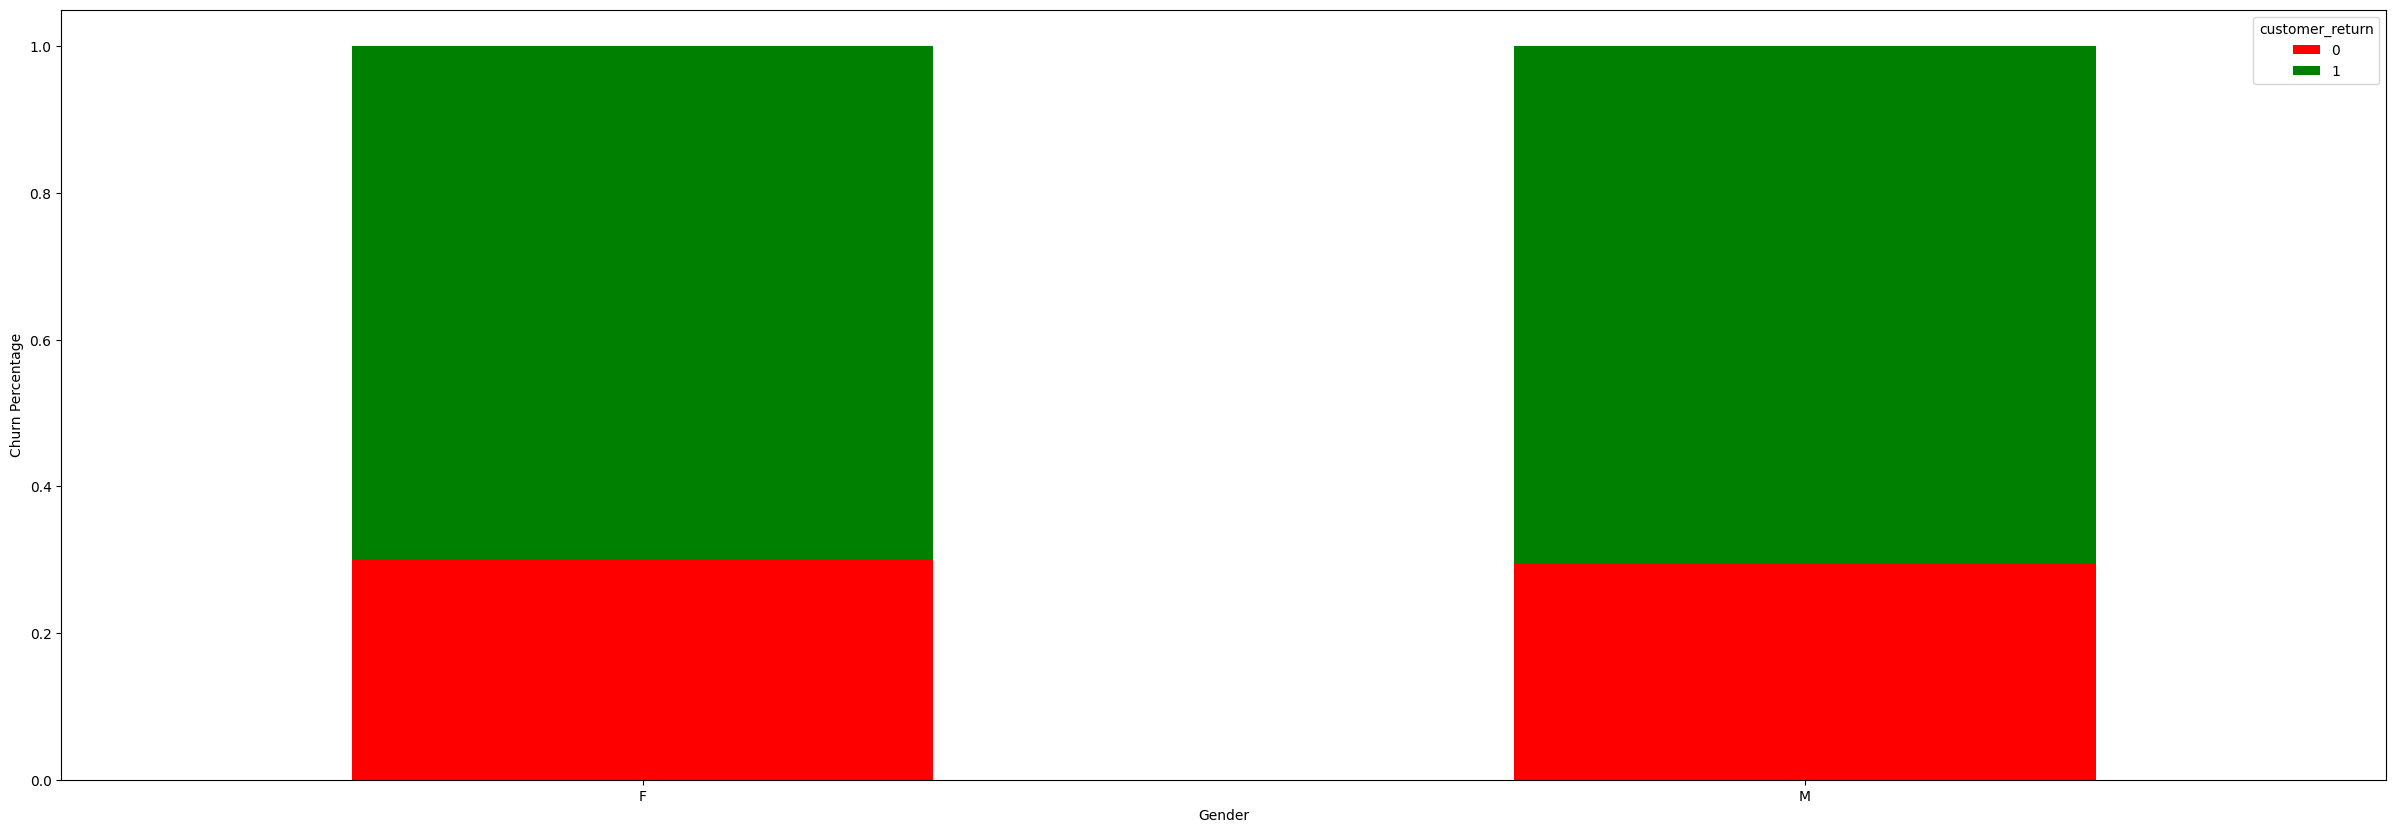

In [14]:
stacked_plot(df, "Gender", "customer_return")

**Age**

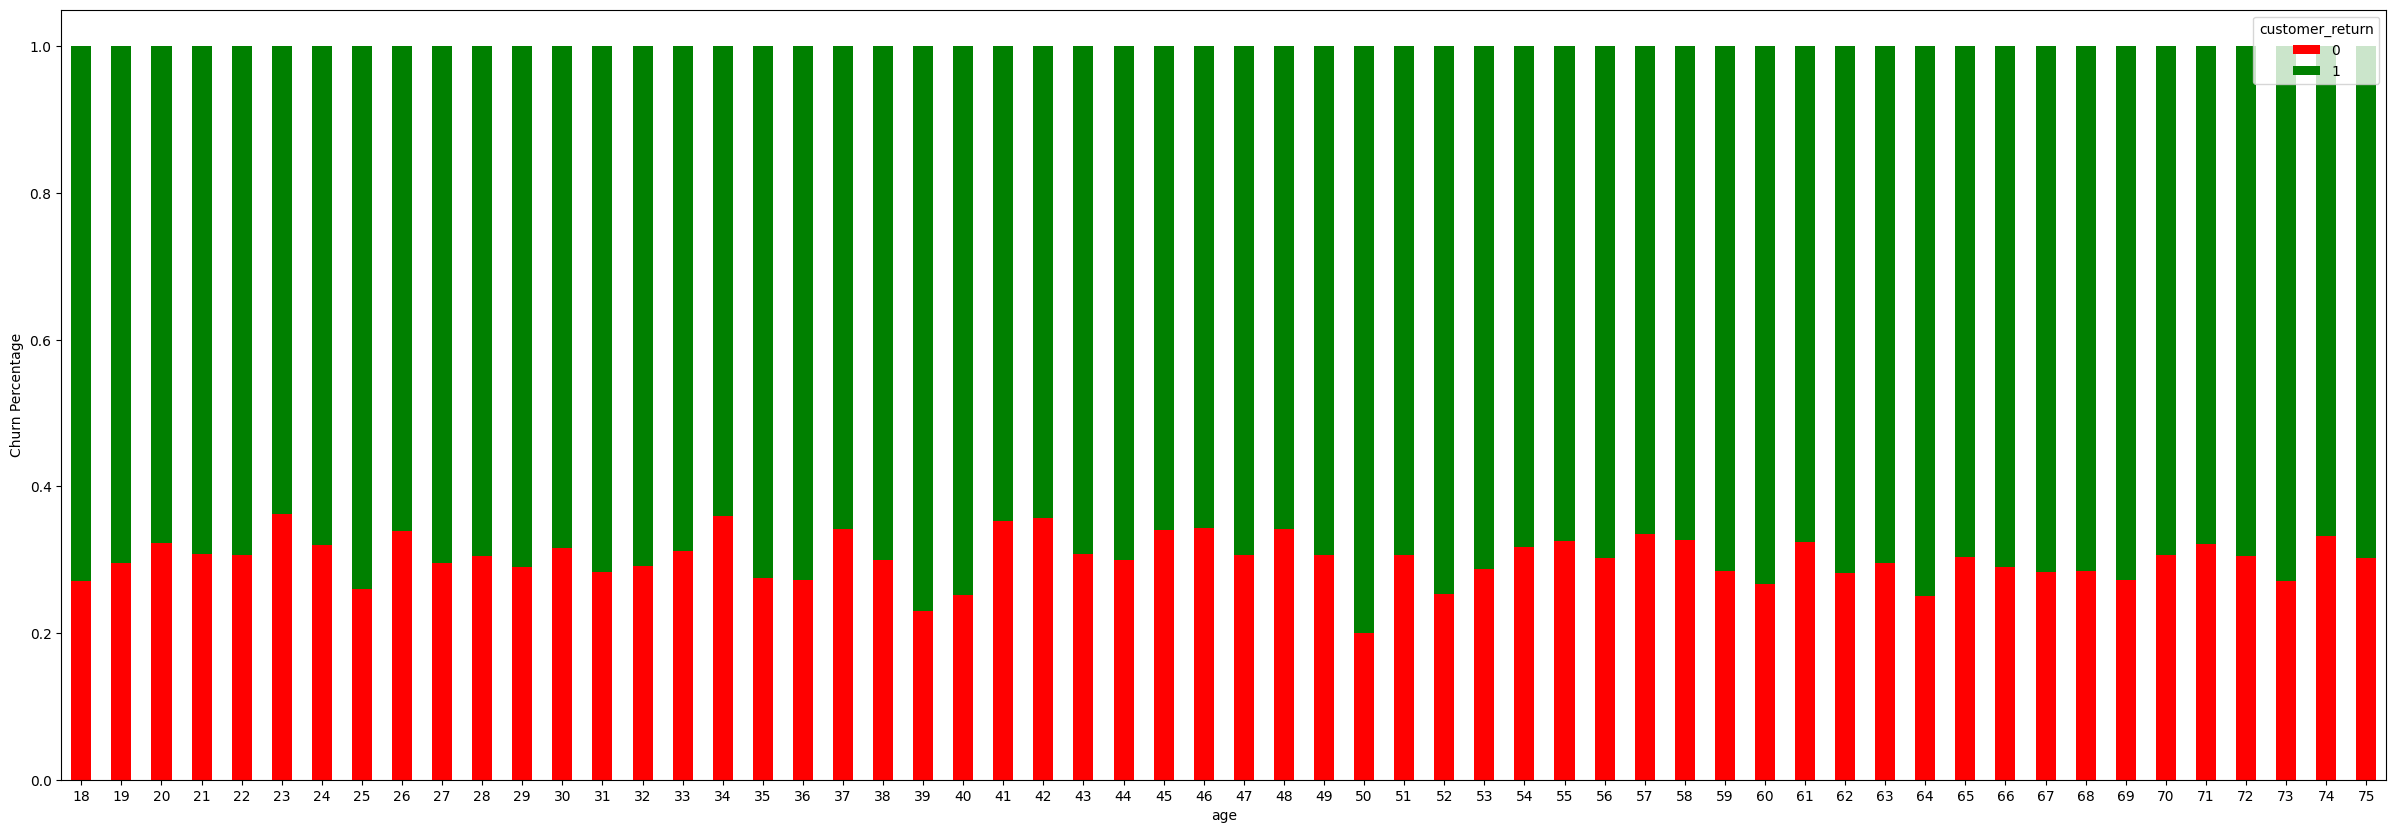

In [15]:
stacked_plot(df, "age", "customer_return")

**Quantity**
> Khách hàng đặt mua số lượng lớn hơn có thể quay lại nhiều hơn, cho thấy họ có nhu cầu cao về sản phẩm hoặc là khách hàng trung thành.

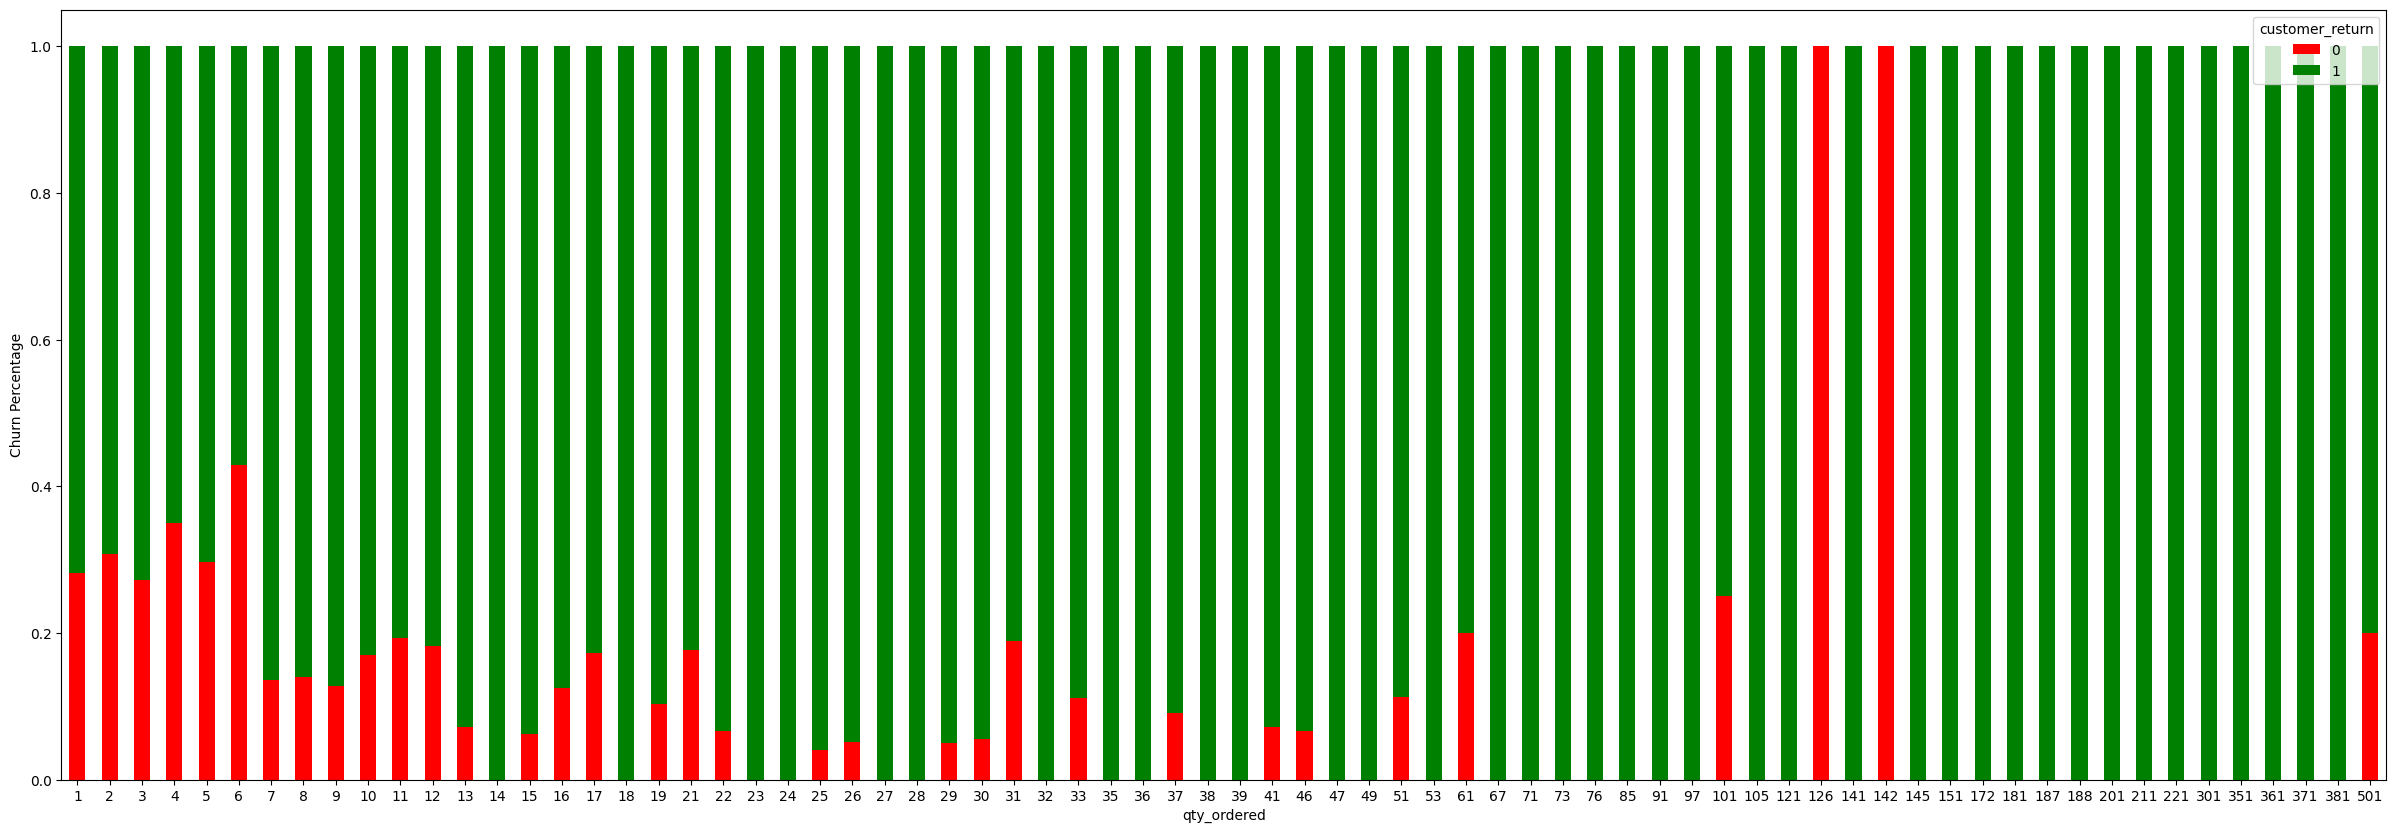

In [16]:
stacked_plot(df, "qty_ordered", "customer_return")

**Payment method**

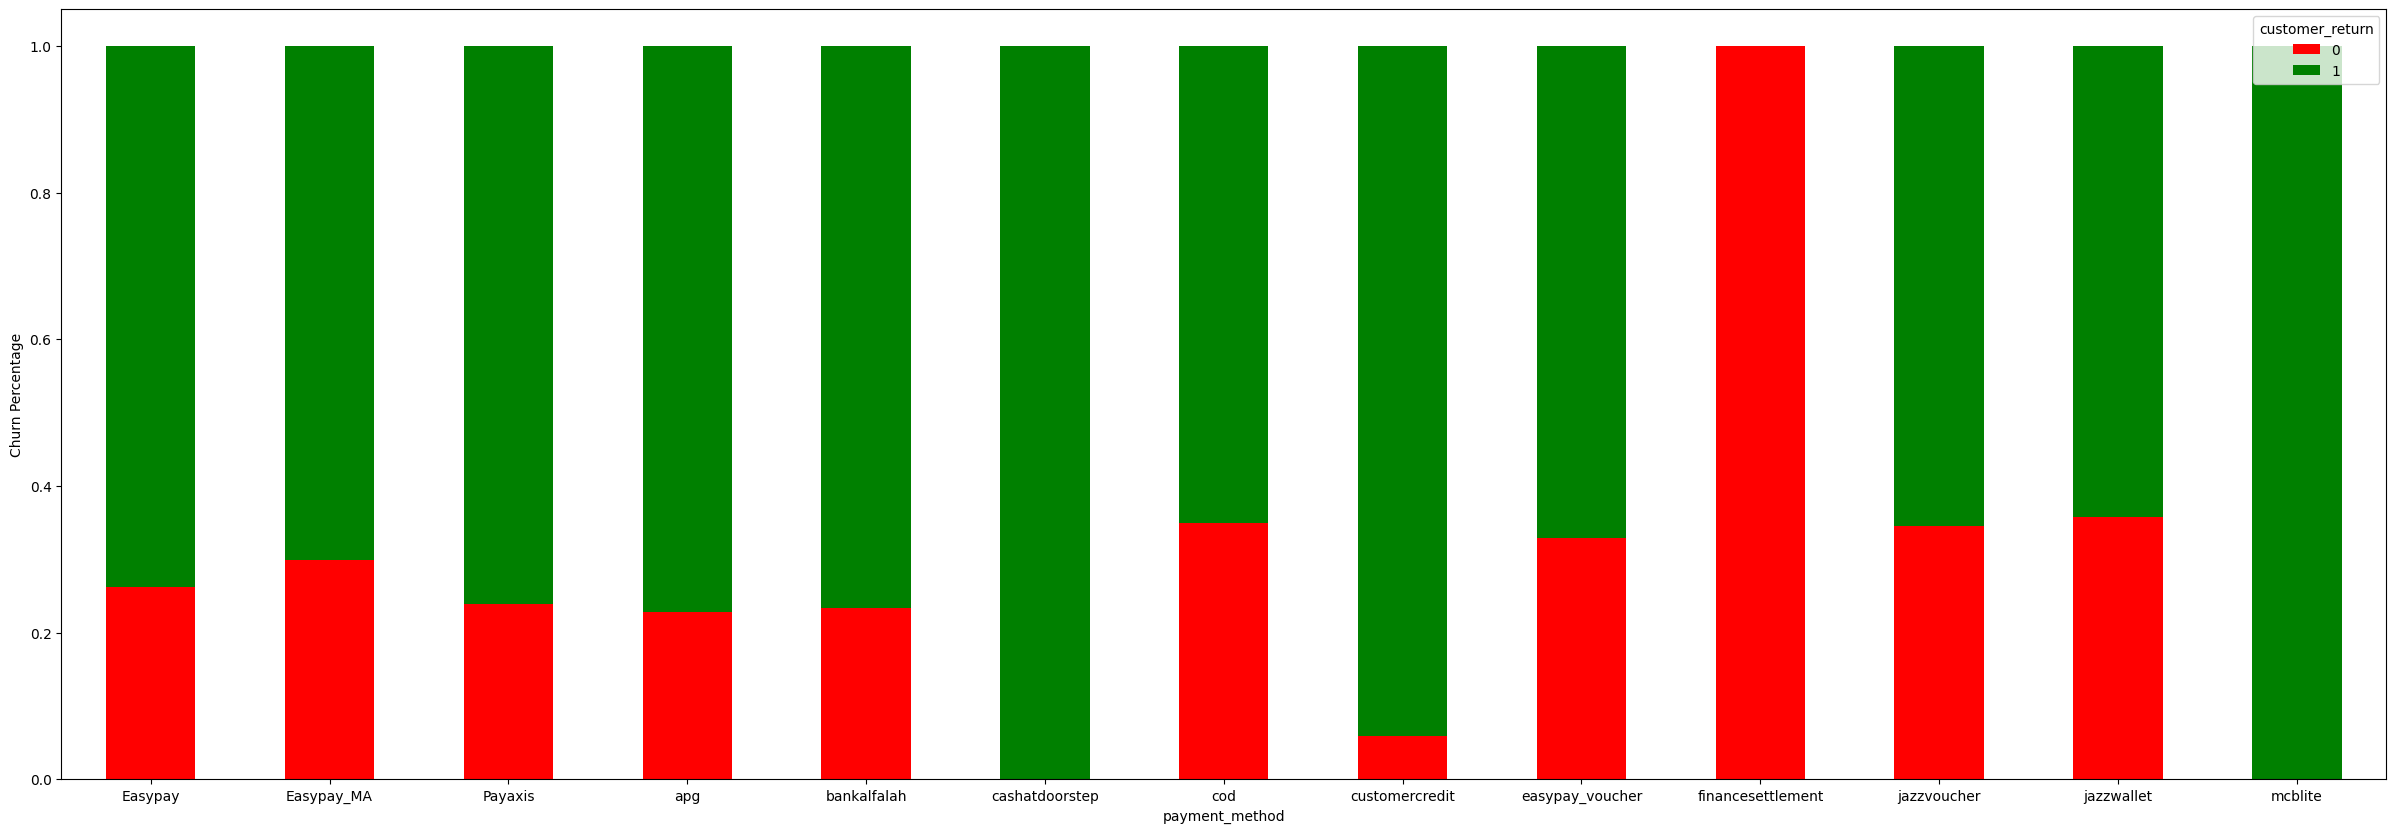

In [17]:
stacked_plot(df, "payment_method", "customer_return")

**Category**

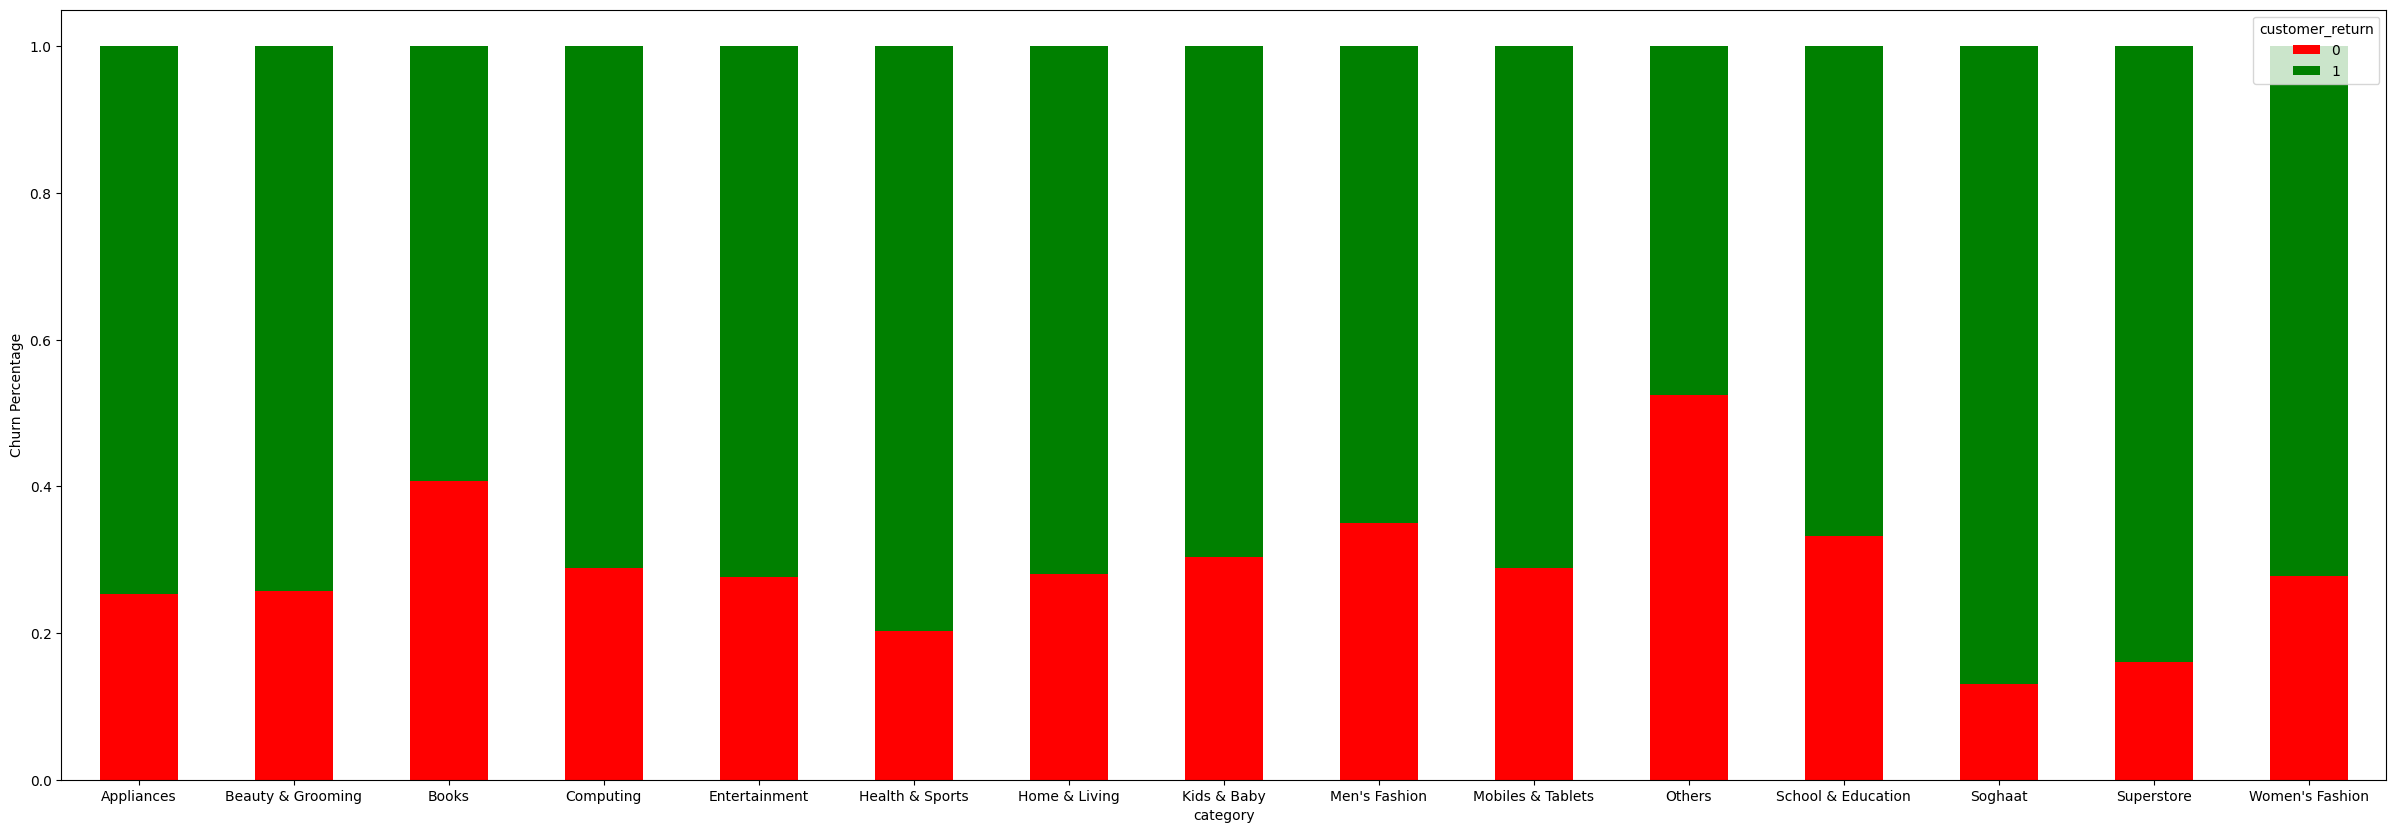

In [18]:
stacked_plot(df, "category", "customer_return")

**Biến mục tiêu: coustomer_return**

In [31]:
df['customer_return'].value_counts()


customer_return
1    200935
0     85457
Name: count, dtype: int64

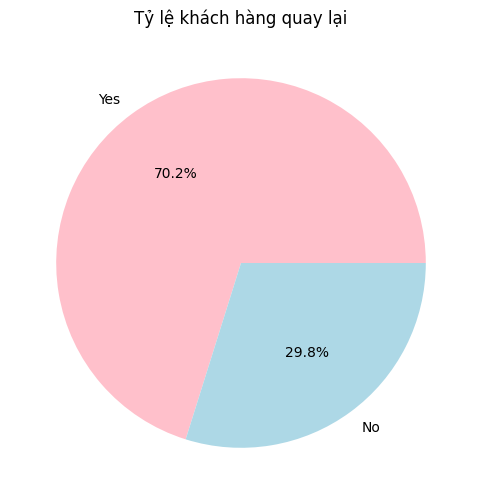

In [30]:
plt.figure(figsize=(8, 6))
plt.pie(df['customer_return'].value_counts(), 
        labels=['Yes', 'No'], 
        autopct='%1.1f%%', 
        colors=['pink', 'lightblue'])
plt.title('Tỷ lệ khách hàng quay lại')
plt.show()

#### Tương quan

In [37]:
numeric_df = df.select_dtypes(include=[float, int])
numeric_df.corr()

,qty_ordered,price,value,discount_amount,total,cust_id,year,age,Zip,Discount_Percent,customer_return
qty_ordered,1.000000,-0.103748,0.005123,0.021244,0.002603,-0.012639,0.119646,0.000552,0.005192,0.073697,0.035180
price,-0.103748,1.000000,0.767113,0.241494,0.770518,0.107743,0.019229,-0.007935,-0.000976,0.053462,0.032671
value,0.005123,0.767113,1.000000,0.403482,0.992955,0.115429,0.039287,-0.002973,-0.003190,0.077948,0.020818
discount_amount,0.021244,0.241494,0.403482,1.000000,0.292218,-0.020460,-0.092108,0.000782,0.002785,0.426131,0.001467
total,0.002603,0.770518,0.992955,0.292218,1.000000,0.123297,0.052991,-0.003209,-0.003695,0.026287,0.021570
cust_id,-0.012639,0.107743,0.115429,-0.020460,0.123297,1.000000,0.352969,-0.006795,-0.001935,-0.153045,-0.271894
year,0.119646,0.019229,0.039287,-0.092108,0.052991,0.352969,1.000000,0.000048,-0.000731,-0.181190,0.032444
age,0.000552,-0.007935,-0.002973,0.000782,-0.003209,-0.006795,0.000048,1.000000,0.001808,-0.001719,0.007246
Zip,0.005192,-0.000976,-0.003190,0.002785,-0.003695,-0.001935,-0.000731,0.001808,1.000000,-0.004532,0.002201
Discount_Percent,0.073697,0.053462,0.077948,0.426131,0.026287,-0.153045,-0.181190,-0.001719,-0.004532,1.000000,0.094379


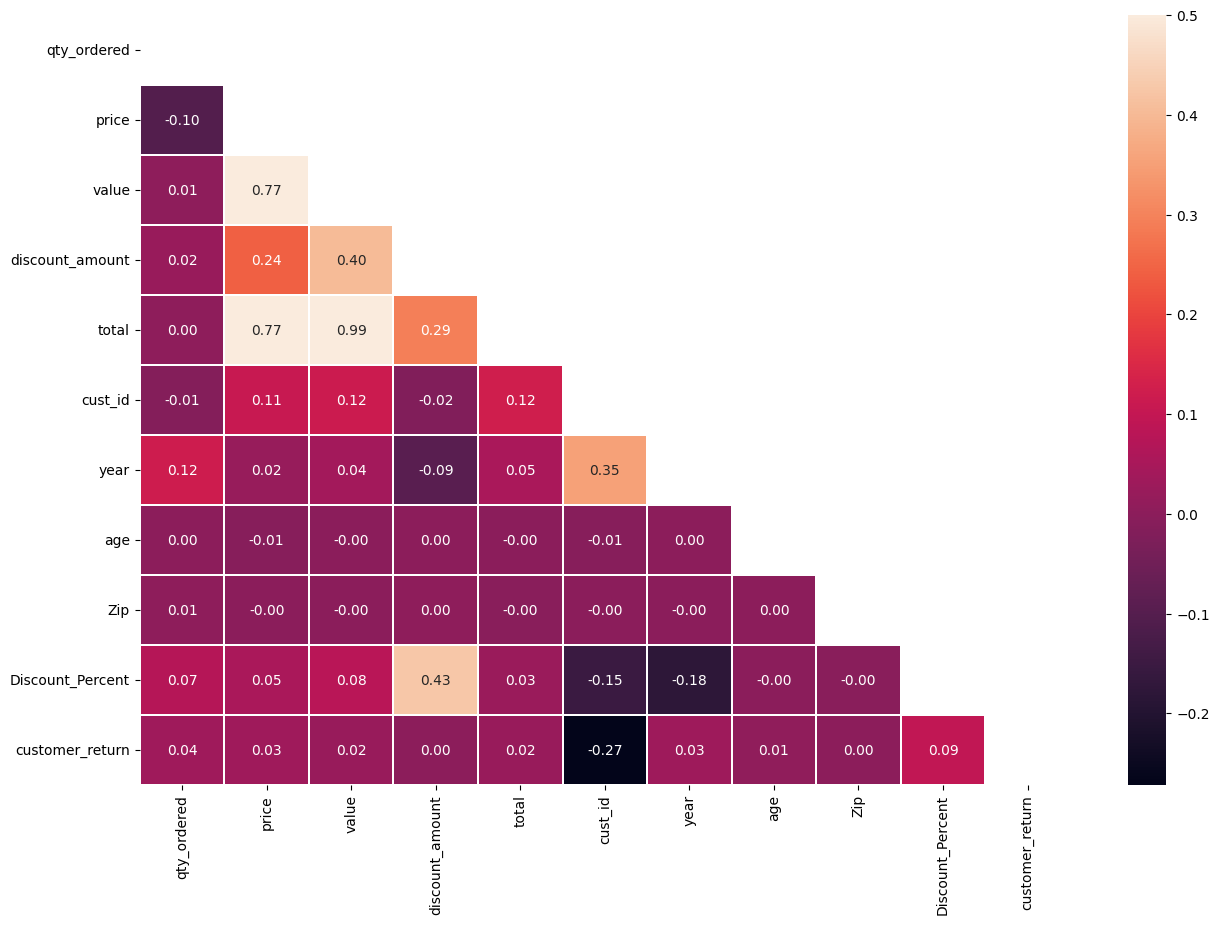

In [49]:
# Calculate correlations
corr_matrix = numeric_df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            vmax=.5,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2)
plt.show()

In [44]:
df_copy = df.copy()

for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = df_copy[col].astype('category')
        df_copy[col] = df_copy[col].cat.codes

df_copy.head()

,order_date,status,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,Gender,age,Customer Since,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent,customer_return,payment_status
0,31,10,21,89.9,1798.0,0.0,1798.0,8,6,2,60124,2020,10,0,43,10176,14758,1005,14758,36,73571,2,31513,0.0,1,0
1,31,10,11,19.0,190.0,0.0,190.0,8,6,2,60124,2020,10,0,43,10176,14758,1005,14758,36,73571,2,31513,0.0,1,0
2,31,3,9,149.9,1199.2,0.0,1199.2,8,6,1,60124,2020,10,0,43,10176,14758,1005,14758,36,73571,2,31513,0.0,1,0
3,31,3,9,79.9,639.2,0.0,639.2,8,6,1,60124,2020,10,0,43,10176,14758,1005,14758,36,73571,2,31513,0.0,1,0
4,66,10,2,99.9,99.9,0.0,99.9,8,6,2,60124,2020,9,0,43,10176,14758,1005,14758,36,73571,2,31513,0.0,1,0


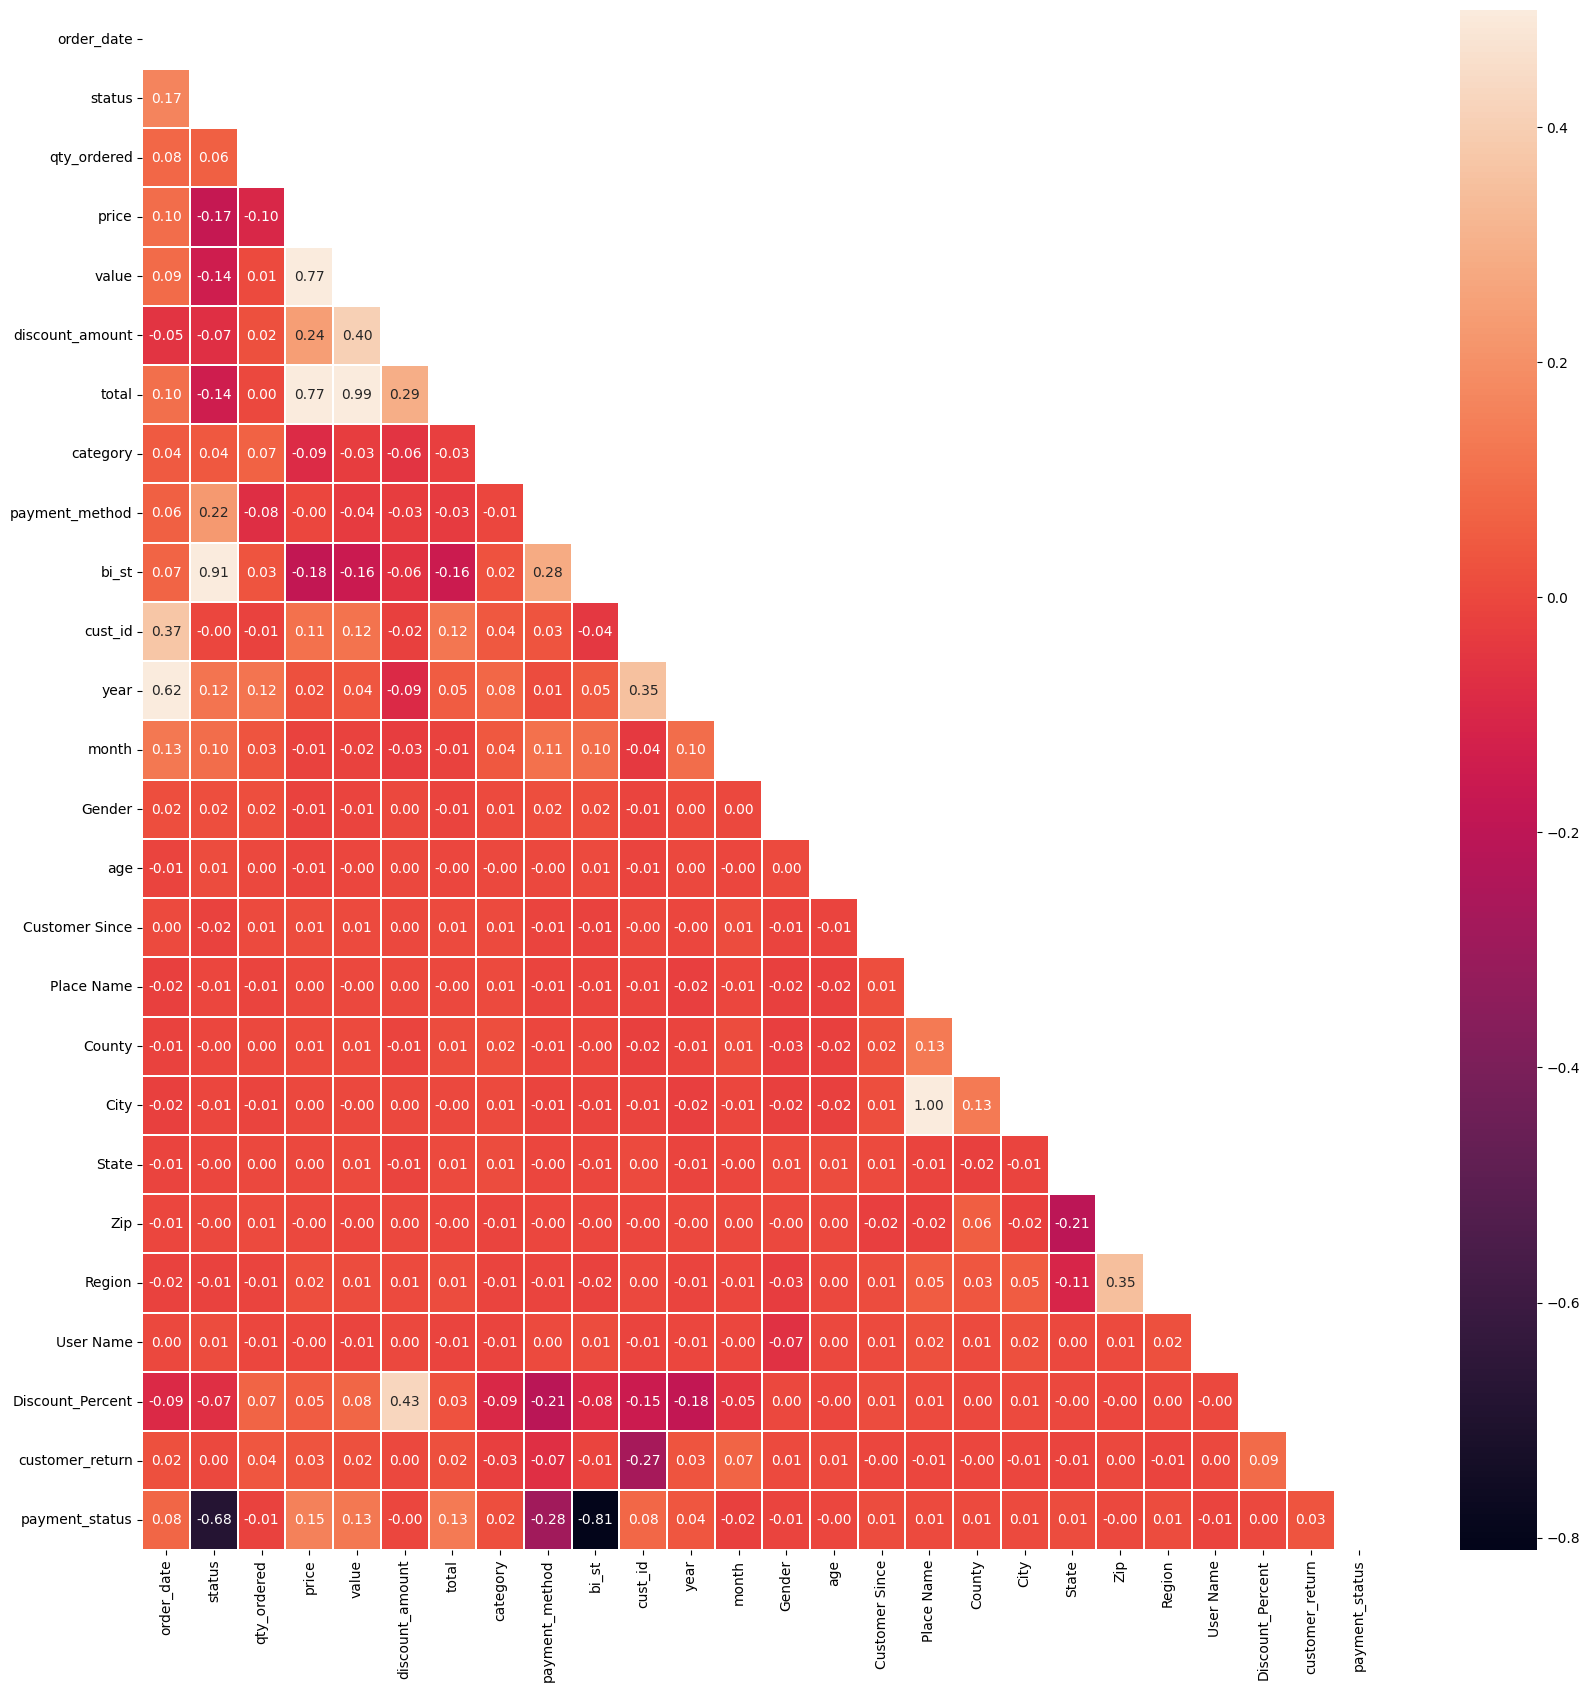

In [48]:
corr_matrix = df_copy.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,
            vmax=.5,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2)
plt.show()